Teilprüfung 3

Schreibe einen Code, der für die vier möglichen Grade an Polynomen eine k-fache Kreuzvalidierung durchführt.
Write a code that performs k-fold cross-validation for the four possible degrees of polynomials

In [61]:
# data
y = []
for i in range(0,70,10):
    y.append(i)
for i in range(60,100,1):
    y.append(i)
x = []
for i in range(len(y)):
    x.append(i)
print (x,y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46] [0, 10, 20, 30, 40, 50, 60, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [57]:
import random 

k_folds = 5 #how often to divide data

def make_partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

def calc_MQF(x,y,mymodel):
    f_x = mymodel(x)    
    MQF = 0
    for i, yi in enumerate(y):
        MQF += np.square(yi-f_x[i])
    MQF/=len(y)
    return MQF

lists_x = make_partition(x, k_folds) # divide in k lists

#man könnte lists_x als range(len(x)) machen, 
#dann kann ich dasselbe wie hierunter auch für x machen, dann generalisierter!
#aber x ist schon allgm

lists_y = [] #make the same shape of lists for y
for liste_x in lists_x:
    lists_y.append([])
    #sort liste_x 
    liste_x.sort()
    for i in liste_x:
        lists_y[-1].append(y[i])


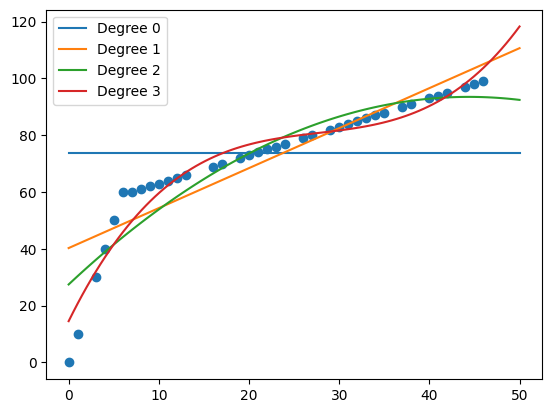

The degree 4 polynomial model fits the data best.


In [64]:
import numpy as np
import matplotlib.pyplot as plt

def concatenate_lists(lists, fold):
    datax = []
    for i,liste in enumerate(lists):
        if i != fold:
            datax.append(liste)
    return np.concatenate((datax))    


#visualize data & models
myline = np.linspace(0,50,100)

plt.scatter(x,y)

#calc MQF for test data
MQF_list = [0,0,0,0]
for fold in range(k_folds):
    #hold_out_set = fold = test set for this iteration
    x = concatenate_lists(lists_x, fold)
    y = concatenate_lists(lists_y, fold)
    #define models
    for i in range(4):
        mymodel =  np.poly1d(np.polyfit(x,y,i))
        MQF_list[i] += calc_MQF(x,y,mymodel)
        if fold == 0:
            plt.plot(myline,mymodel(myline), label = 'Degree '+str(i))

plt.legend()
plt.show()

#find minimal MQF
MQF_min_function = MQF_list.index(min(MQF_list))
print('The degree' ,str( MQF_min_function+1 ), 'polynomial model fits the data best.')
